In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']#, "SigmaRR", 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes- mc have already a fake run period
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5
Selecting events   [ 0 ,  21216525 ]  out of  21216525
number of events: 21216525


In [5]:
qr_mc1.correctAll(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_") 
qr_mc2.correctAll(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_") 

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [6]:
dfmcEB= qr_mc1.df
dfmcEE= qr_mc2.df 
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')

['R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'CovarianceIetaIphi']
plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


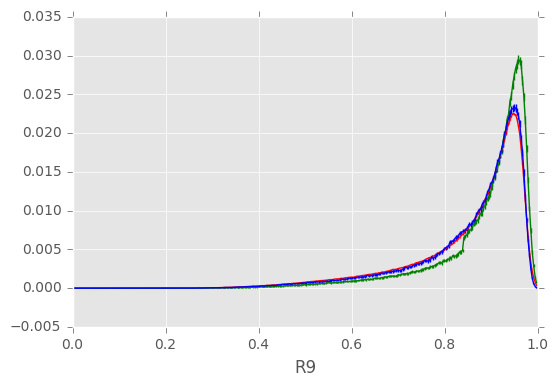

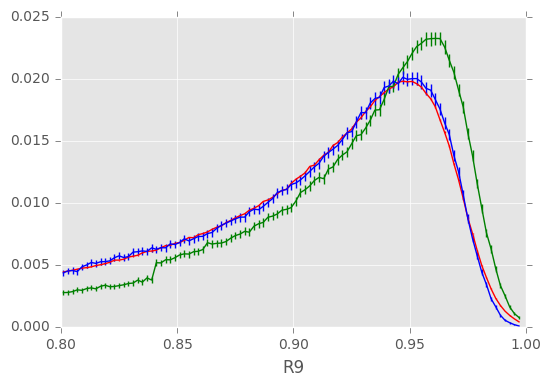

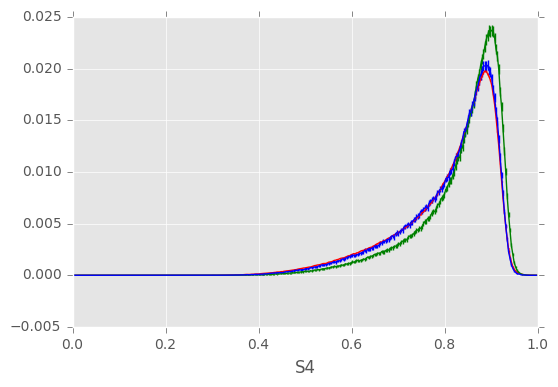

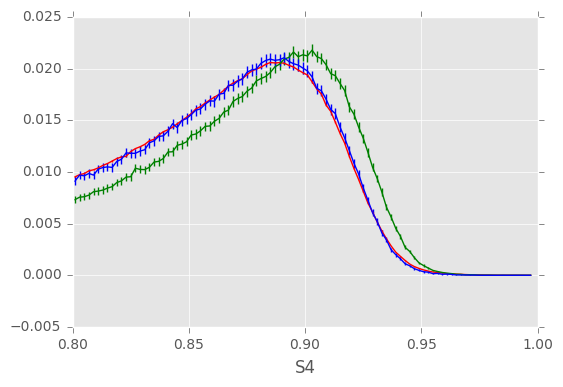

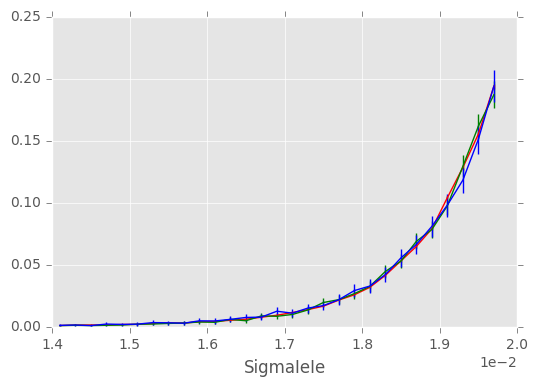

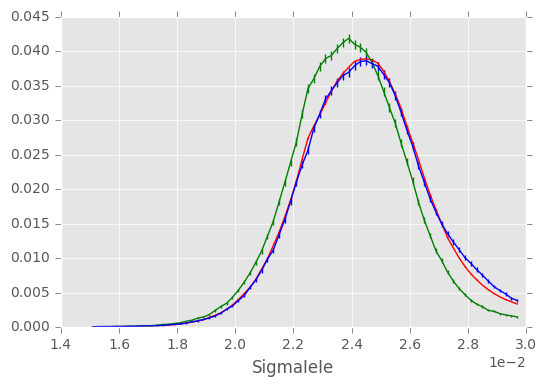

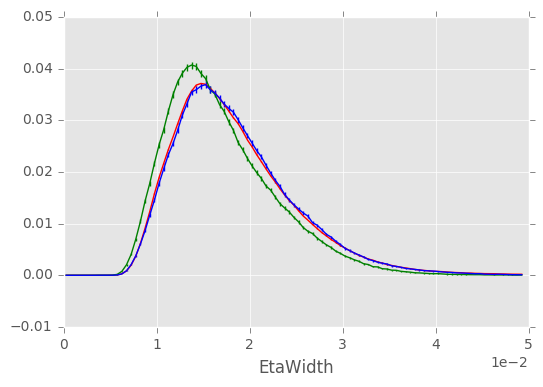

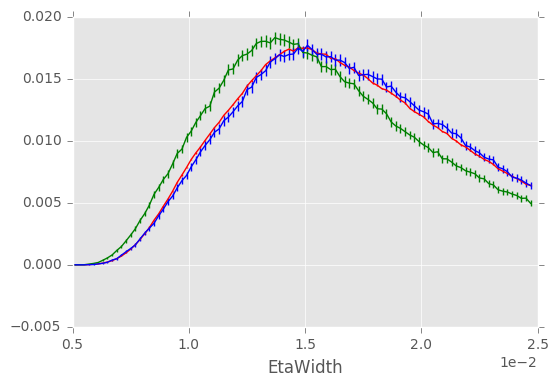

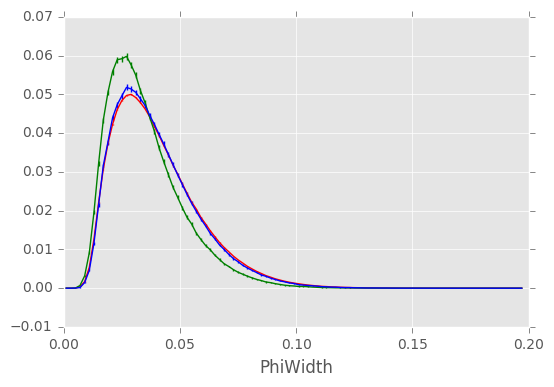

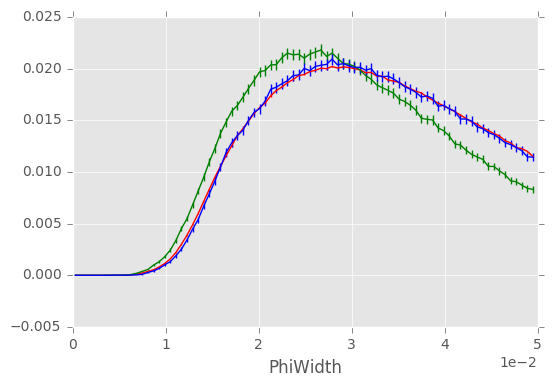

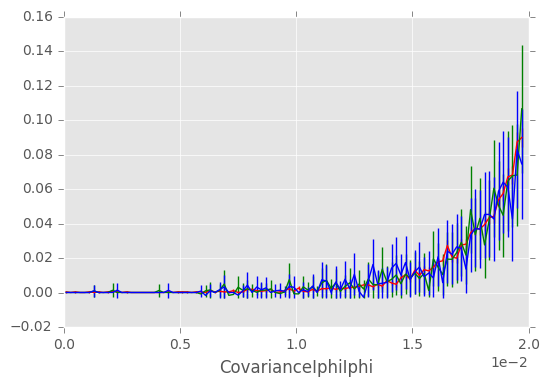

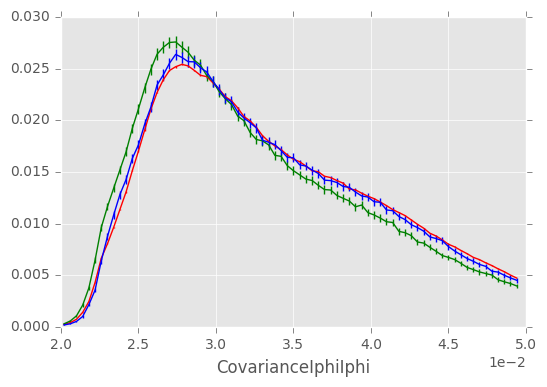

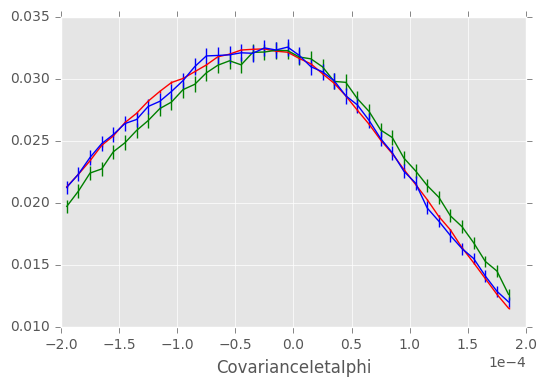

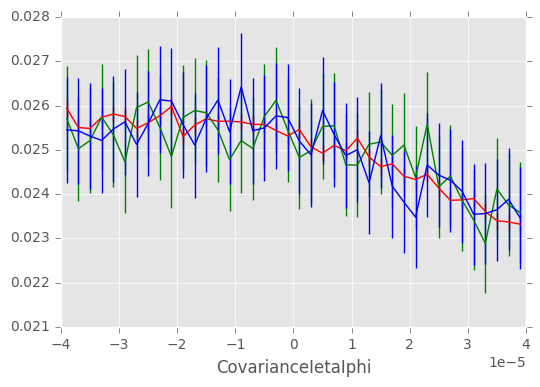

In [15]:
# All periods + integrated + EB
dfm=dfmcEE
dfd=dfdataEE
sec= "EE"
name0="AllPeriods_Integrated_"+sec
section= "section2"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Integrated '+sec+"}")
f.close()
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            rv  = np.arange(0.0,1.0,0.0015)
            rv2 = np.arange(0.8,1.0,0.0015)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "S4":
        if sec=="EB":
            rv = np.arange(0.0,1.0,0.002)
            rv2 = np.arange(0.8,1.0,0.002)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        if sec=="EB":
            rv = np.arange(0.004,0.03,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
        else:
            rv = np.arange(0.014,0.020,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
    if yvar == "EtaWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.05,0.0002)
            rv2 = np.arange(0.005,0.025,0.0001)
        else:
            rv = np.arange(0.0,0.05,0.0005)
            rv2 = np.arange(0.005,0.025,0.0002)
    if yvar == "PhiWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.2,0.001)
            rv2 = np.arange(0.0,0.05,0.0003)
        else:
            rv = np.arange(0.0,0.2,0.002)
            rv2 = np.arange(0.0,0.05,0.0006)
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            rv  = np.arange(0.0, 0.02,0.0001)
            rv2 = np.arange(0.02, 0.05,0.0002)
        else:
            rv  = np.arange(0.0, 0.02,0.0002)
            rv2 = np.arange(0.02, 0.05,0.0004)
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            rv = np.arange(-0.0002, 0.0002,0.000001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000001)
        else:
            rv = np.arange(-0.0002, 0.0002,0.00001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfd[yvar], rv, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv,Weight=dfm["weight"], Color="g")  
    plot.plotHistErr(dfm[yvar+"_corr"], rv,Weight=dfm["weight"], Color="b")
    fig = plt.figure(dpi=400)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))

    #name= name0+yvar
    #fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    #plot.exportToPdf(name,section)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    plot.plotHistErr(dfd[yvar], rv2, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv2,Weight=dfm["weight"], Color="g") 
    plot.plotHistErr(dfm[yvar+"_corr"], rv2,Weight=dfm["weight"], Color="b")
    name= name0+"Zoom"+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)

['R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'CovarianceIetaIphi']
plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


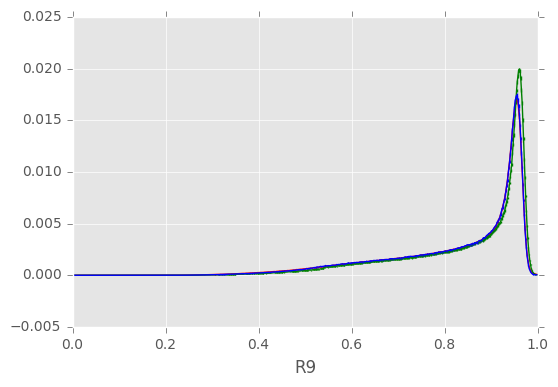

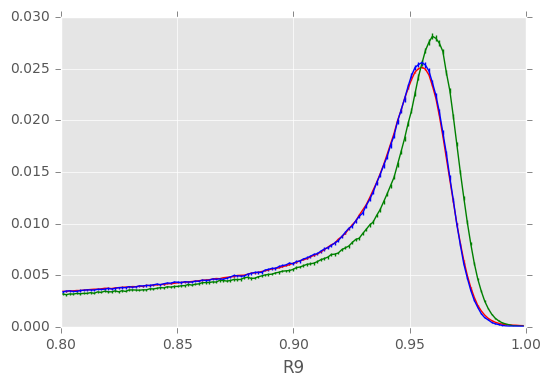

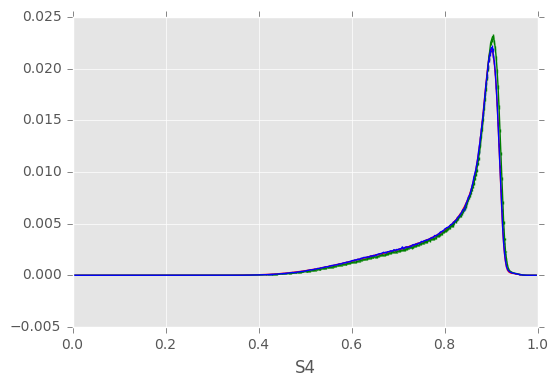

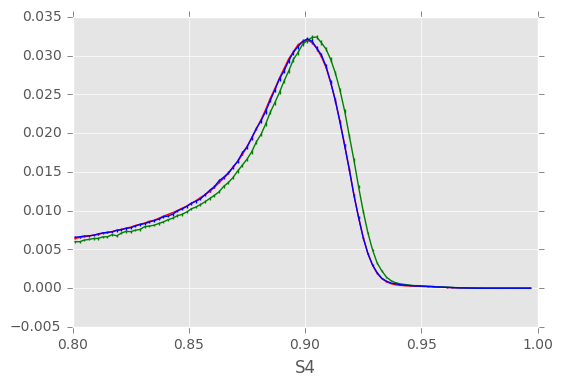

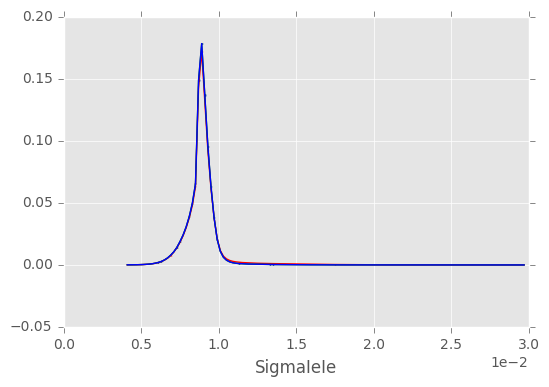

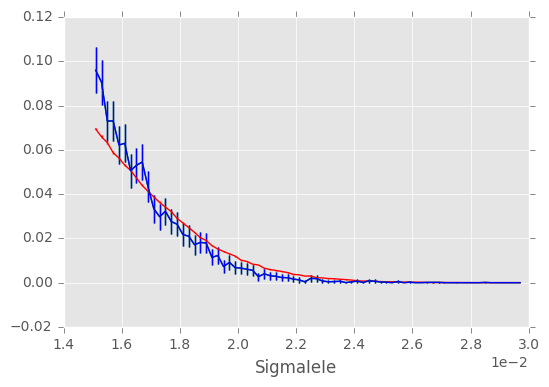

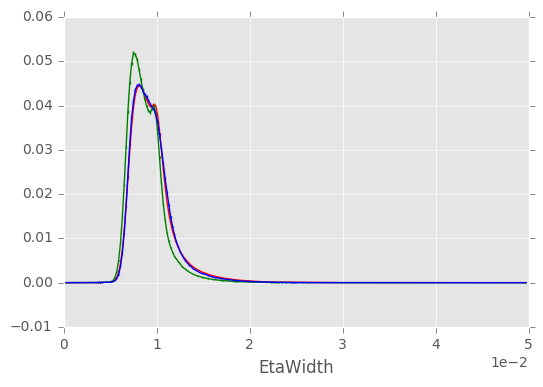

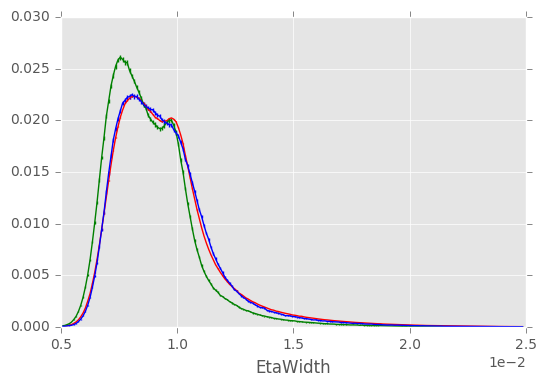

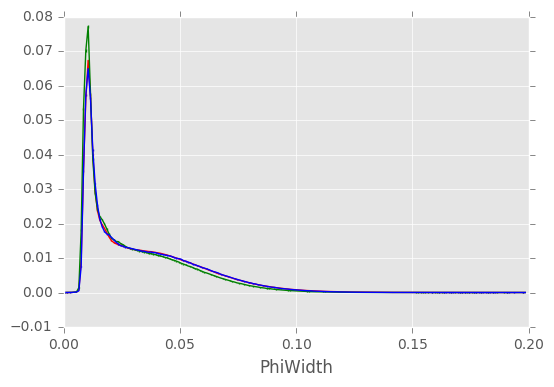

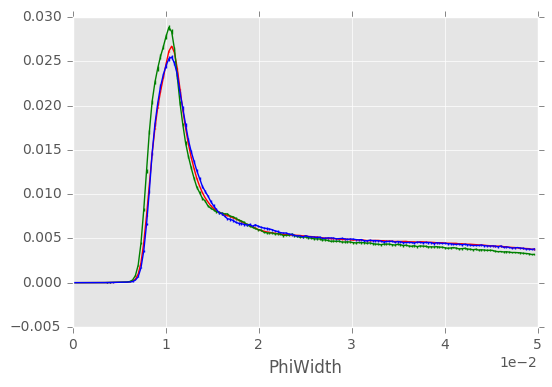

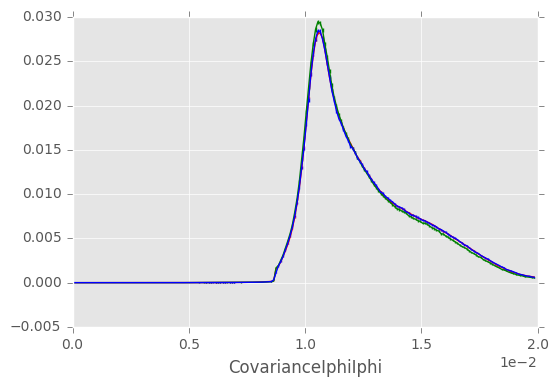

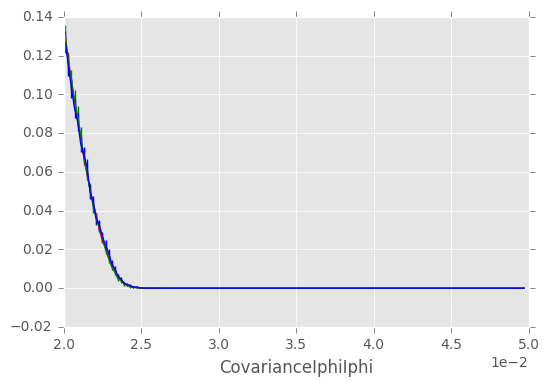

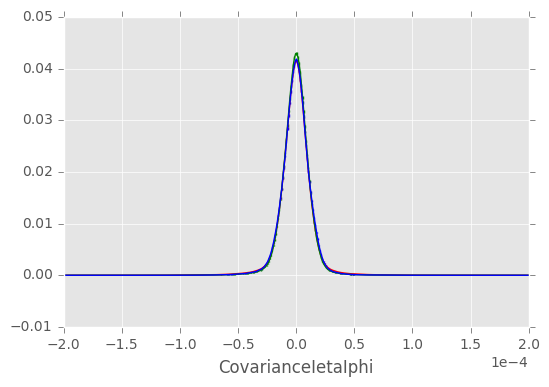

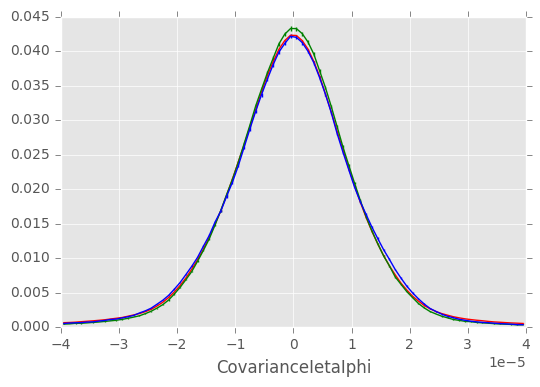

In [8]:
# All periods + integrated + EB
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Integrated_"+sec
section= "section2"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Integrated '+sec+"}")
f.close()
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            rv  = np.arange(0.0,1.0,0.0015)
            rv2 = np.arange(0.8,1.0,0.0015)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "S4":
        if sec=="EB":
            rv = np.arange(0.0,1.0,0.002)
            rv2 = np.arange(0.8,1.0,0.002)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        if sec=="EB":
            rv = np.arange(0.004,0.03,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
        else:
            rv = np.arange(0.014,0.020,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
    if yvar == "EtaWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.05,0.0002)
            rv2 = np.arange(0.005,0.025,0.0001)
        else:
            rv = np.arange(0.0,0.05,0.0005)
            rv2 = np.arange(0.005,0.025,0.0002)
    if yvar == "PhiWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.2,0.001)
            rv2 = np.arange(0.0,0.05,0.0003)
        else:
            rv = np.arange(0.0,0.2,0.002)
            rv2 = np.arange(0.0,0.05,0.0006)
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            rv  = np.arange(0.0, 0.02,0.0001)
            rv2 = np.arange(0.02, 0.05,0.0002)
        else:
            rv  = np.arange(0.0, 0.02,0.0002)
            rv2 = np.arange(0.02, 0.05,0.0004)
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            rv = np.arange(-0.0002, 0.0002,0.000001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000001)
        else:
            rv = np.arange(-0.0002, 0.0002,0.00001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfd[yvar], rv, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv,Weight=dfm["weight"], Color="g")  
    plot.plotHistErr(dfm[yvar+"_corr"], rv,Weight=dfm["weight"], Color="b")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    name= name0+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    plot.plotHistErr(dfd[yvar], rv2, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv2,Weight=dfm["weight"], Color="g") 
    plot.plotHistErr(dfm[yvar+"_corr"], rv2,Weight=dfm["weight"], Color="b")
    name= name0+"Zoom"+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi


/swshare/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


plotting  CovarianceIetaIphi


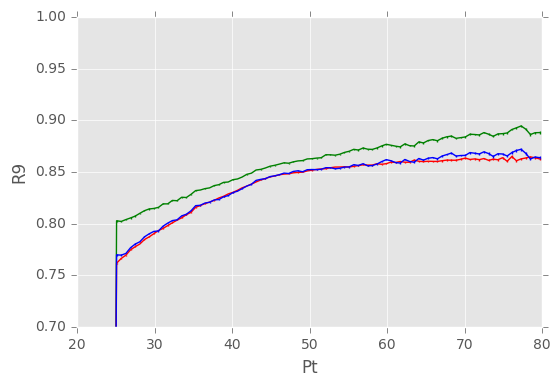

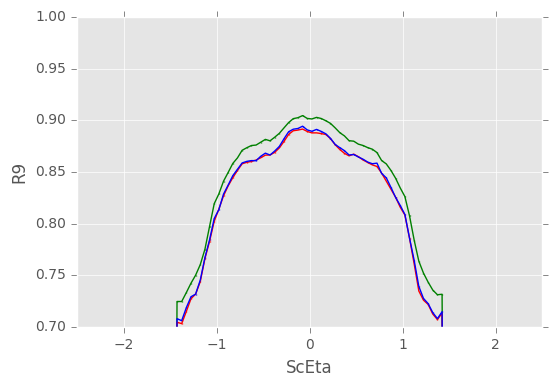

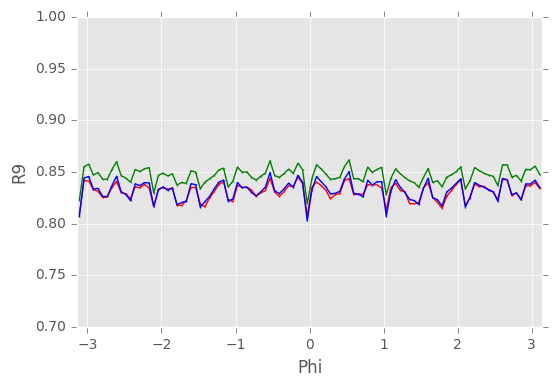

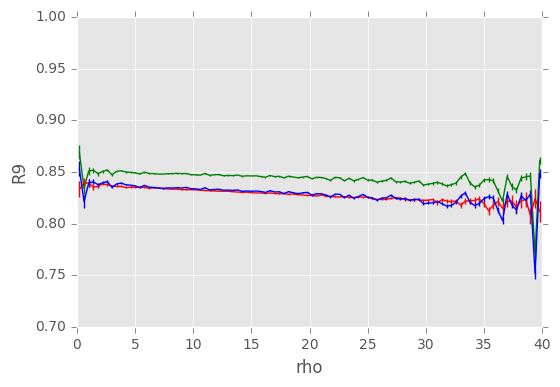

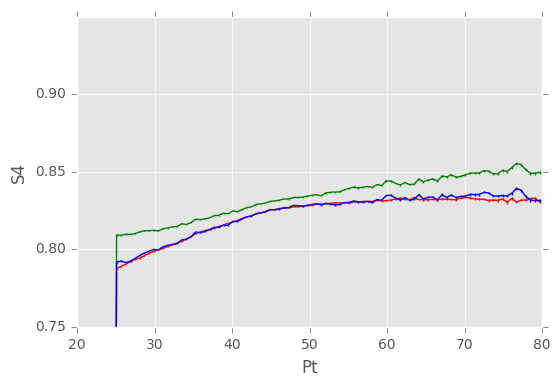

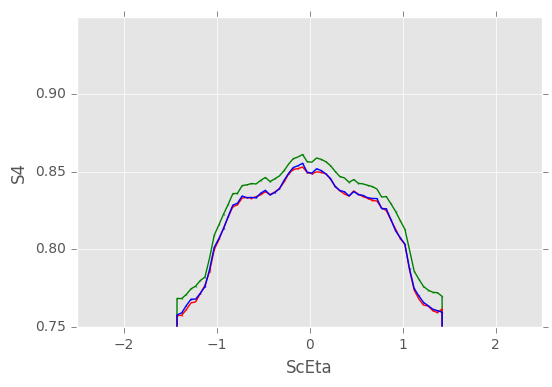

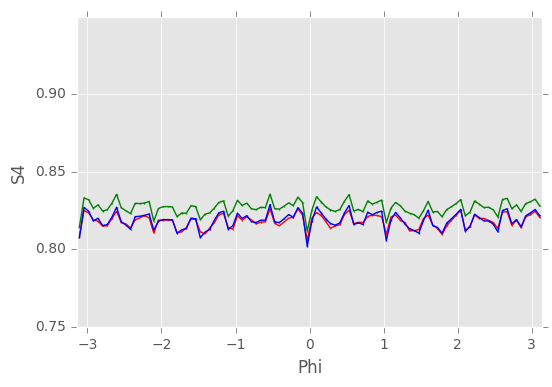

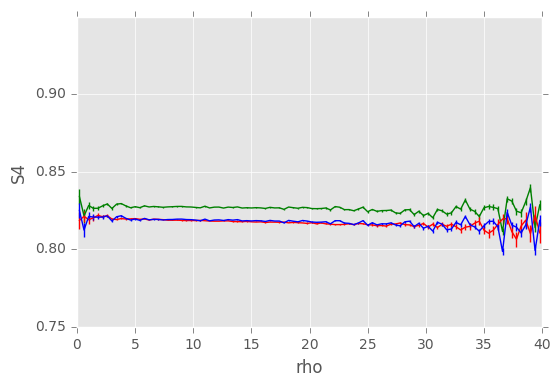

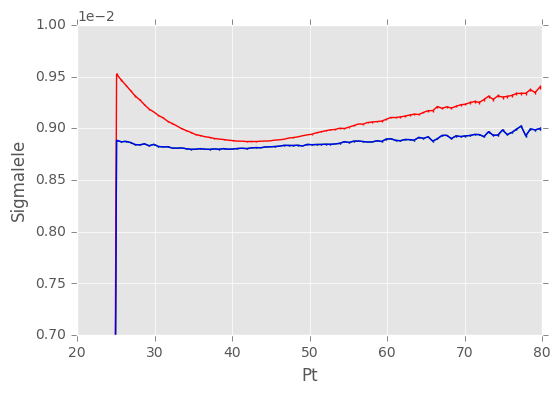

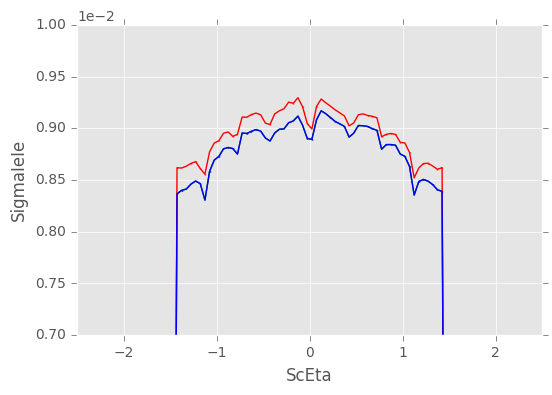

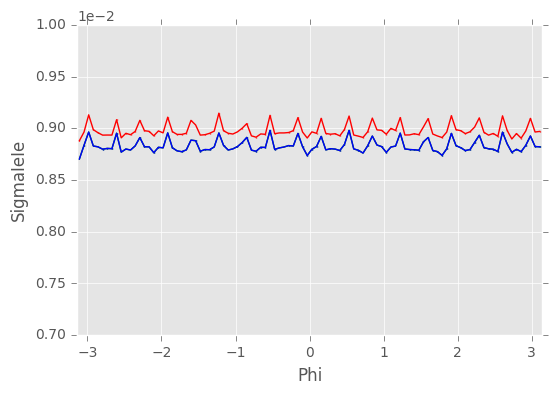

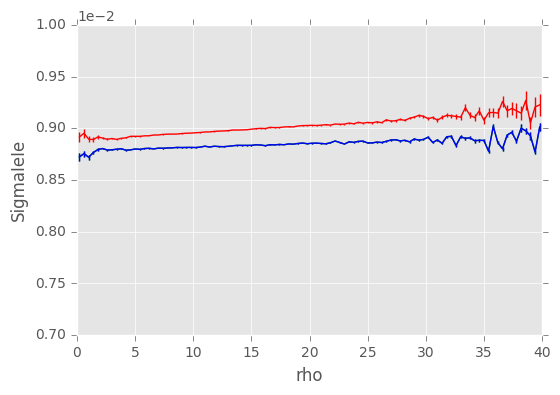

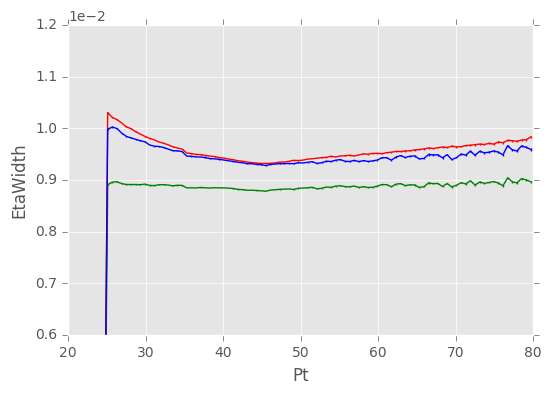

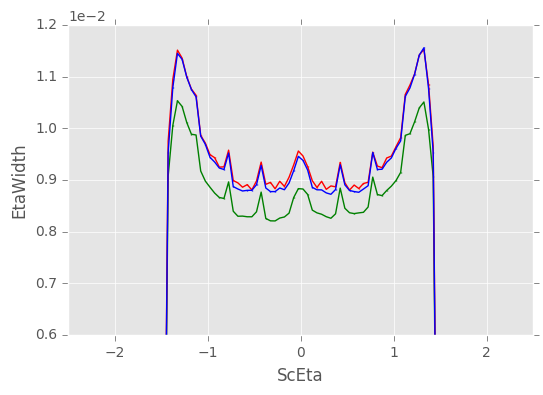

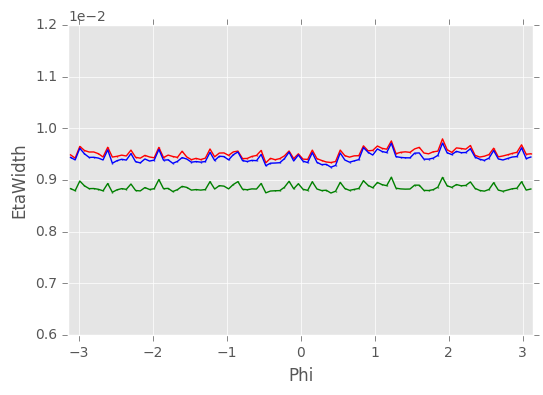

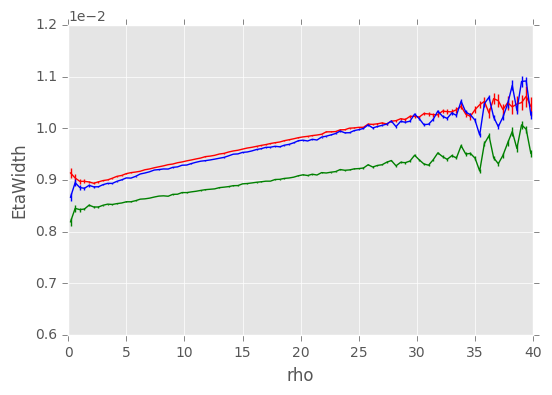

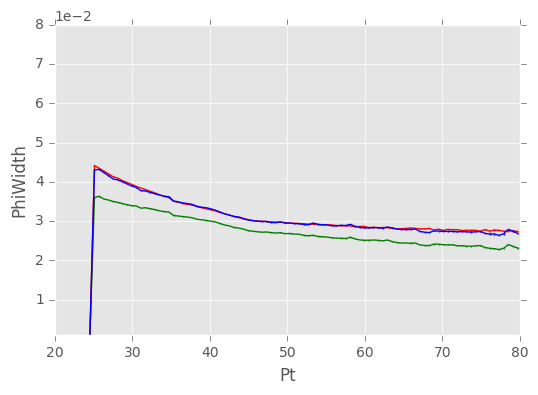

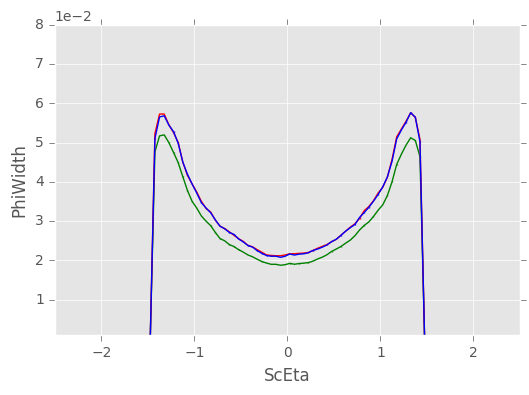

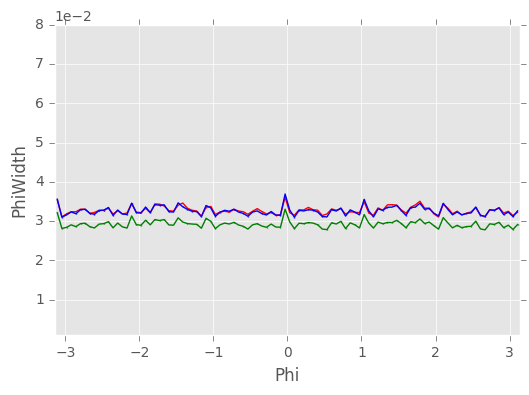

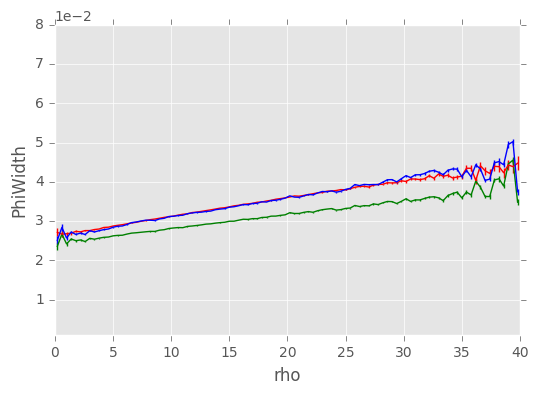

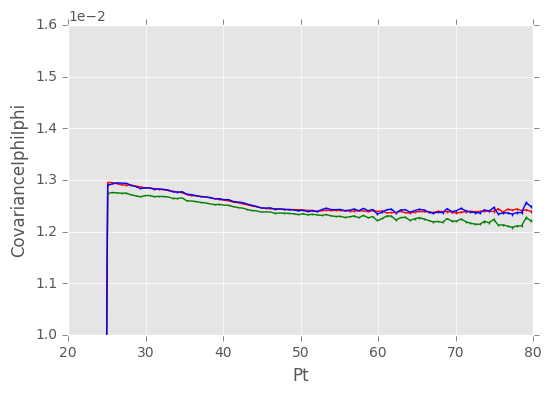

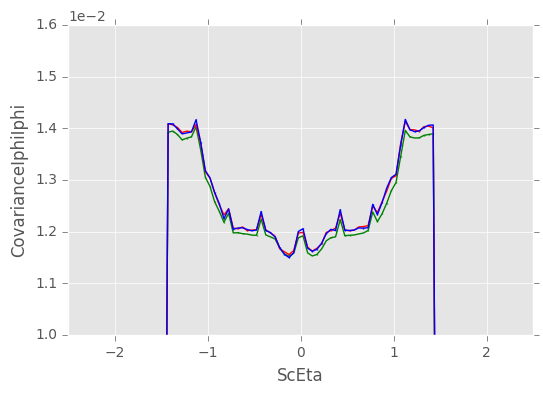

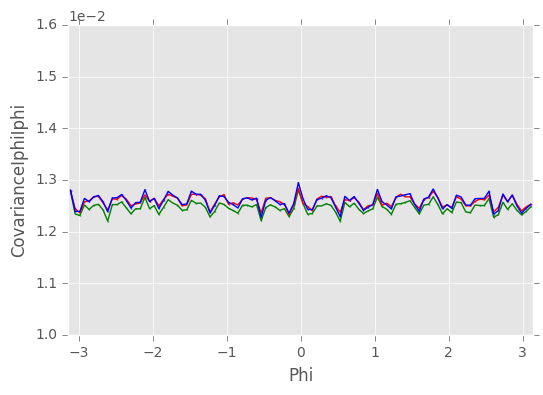

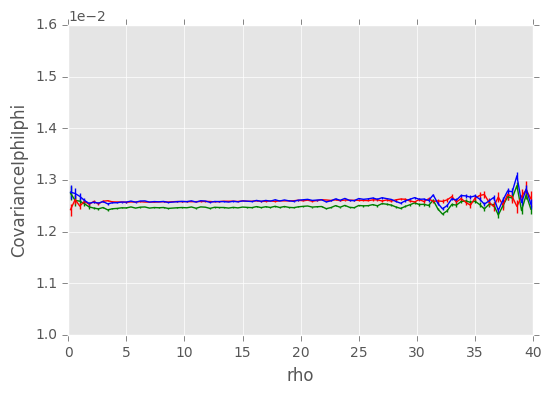

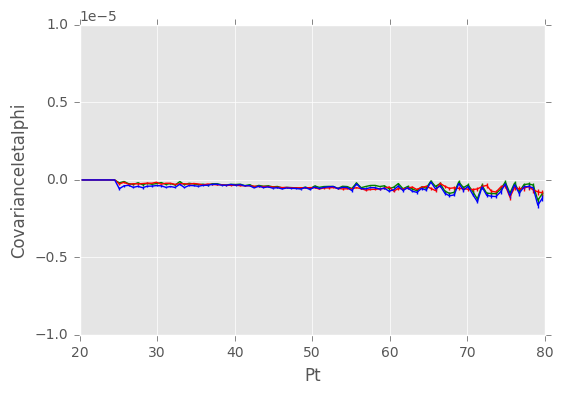

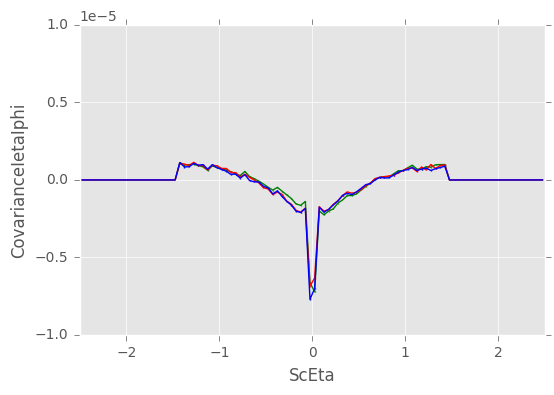

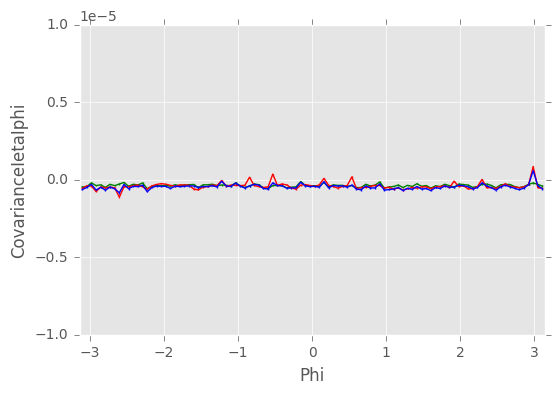

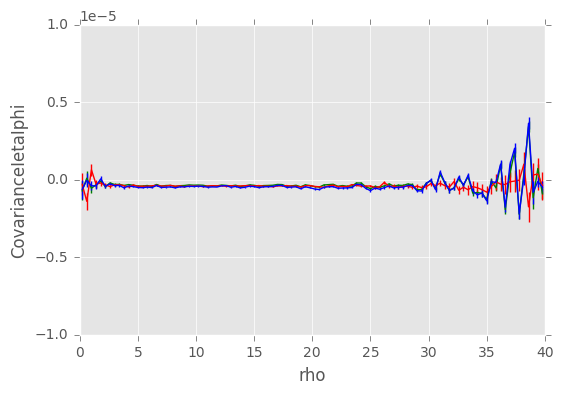

In [9]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Profiles_"+sec
section= "section3"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Profiles '+sec+"}")
f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.01
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        plot.exportToPdf(name,section)

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


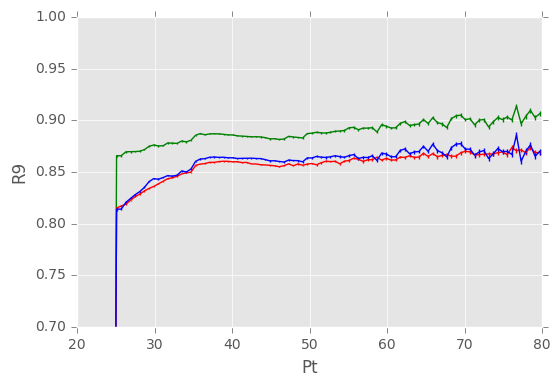

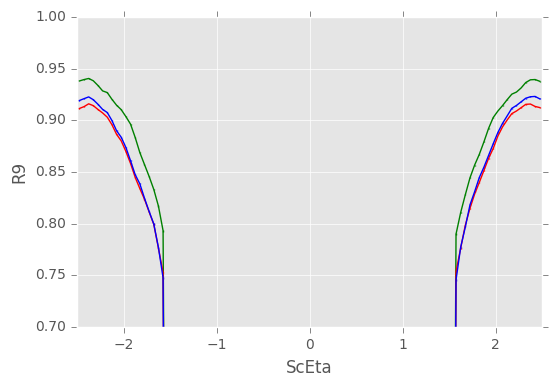

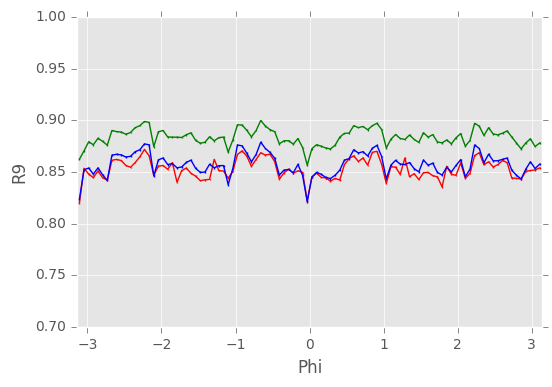

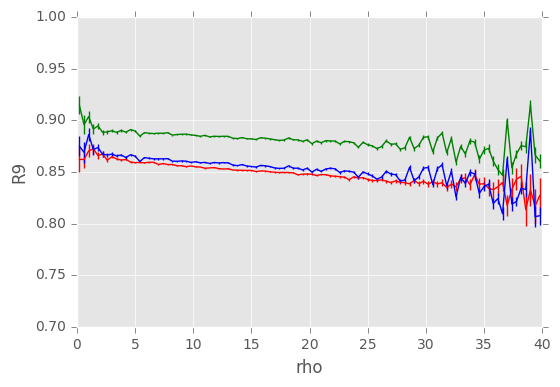

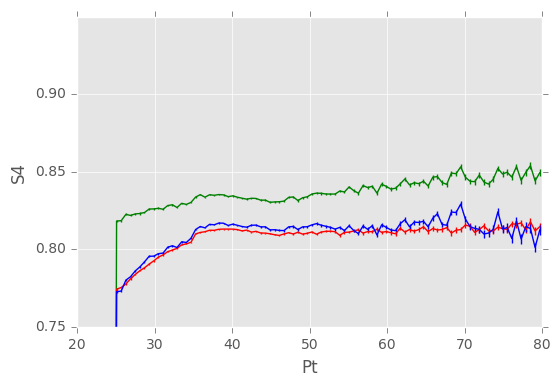

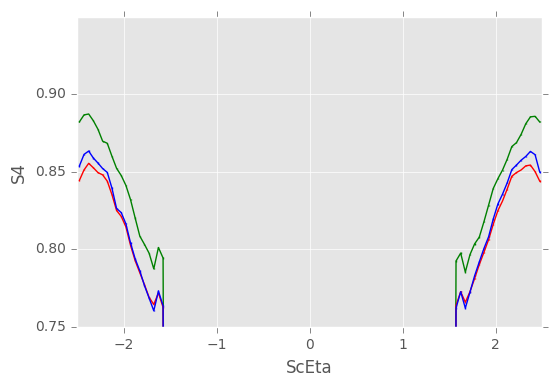

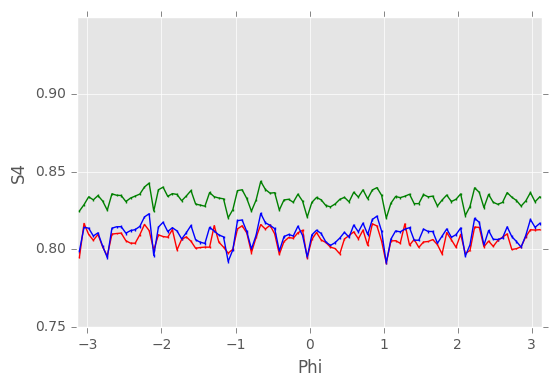

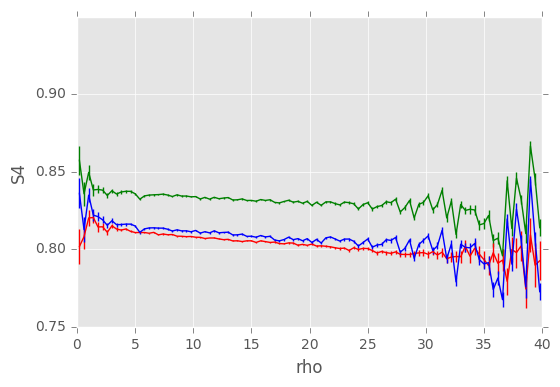

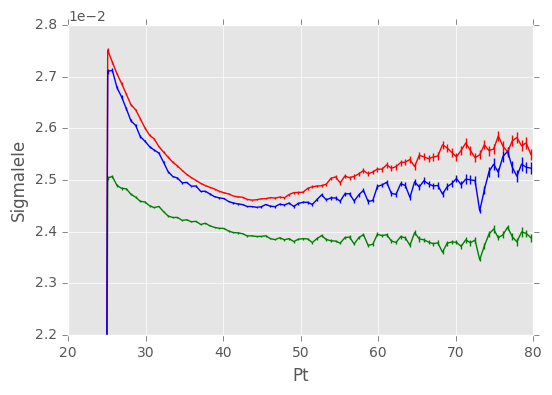

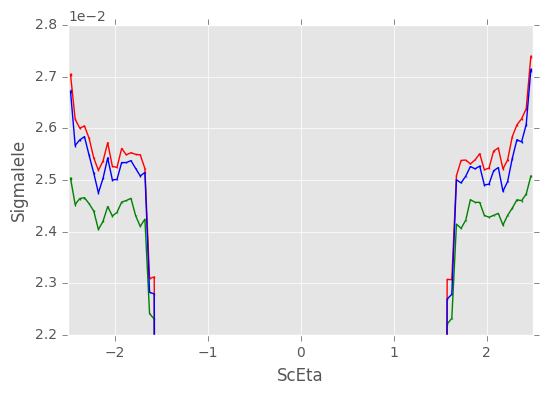

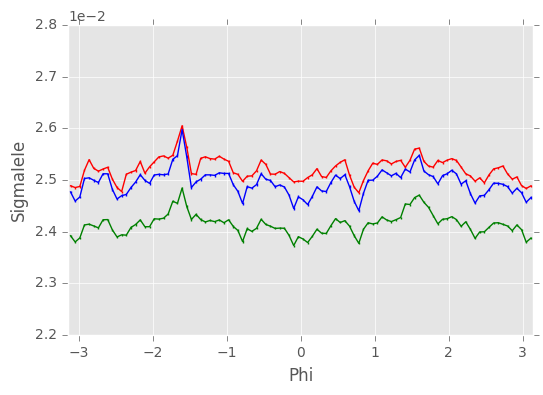

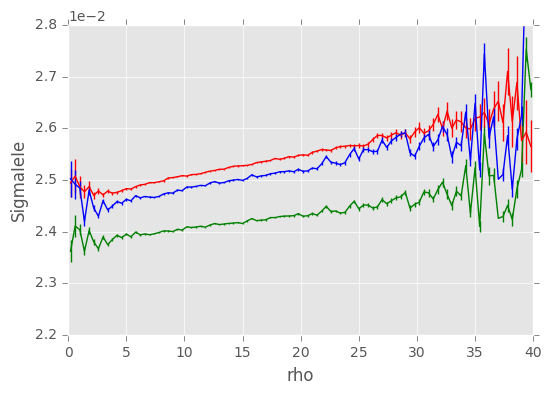

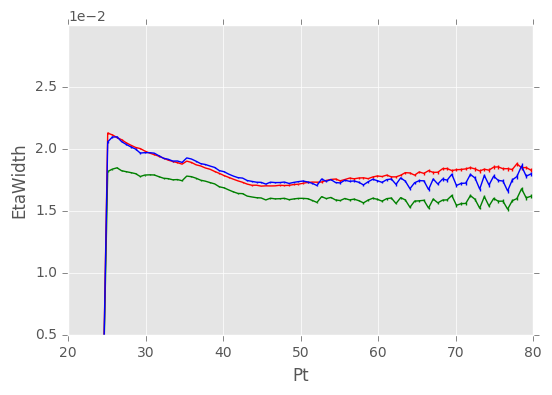

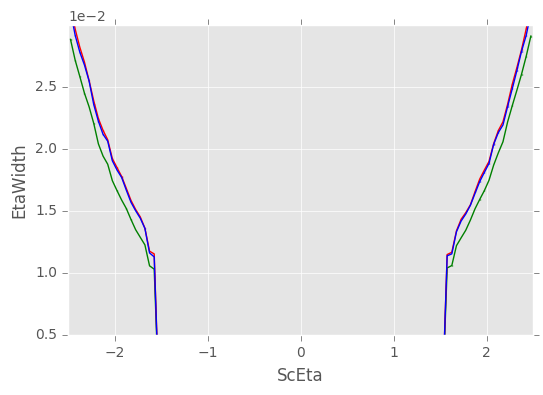

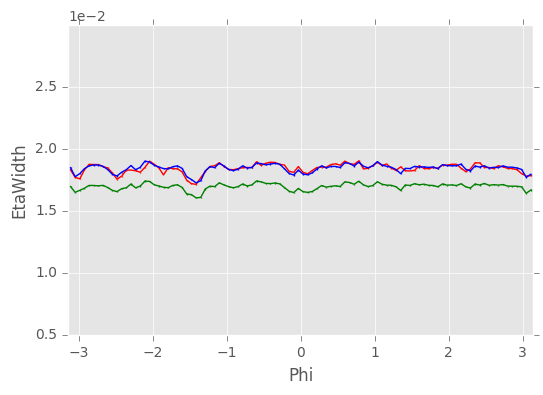

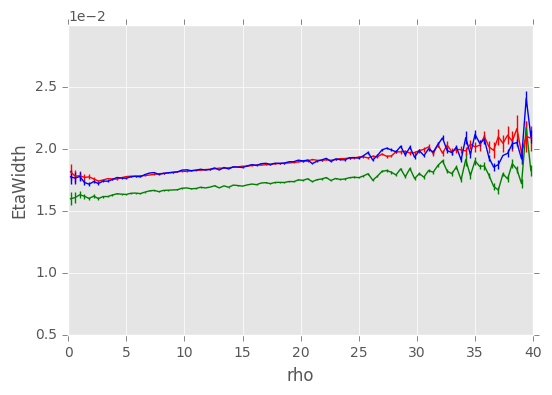

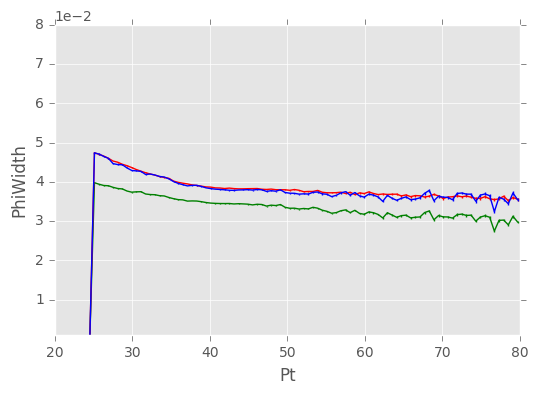

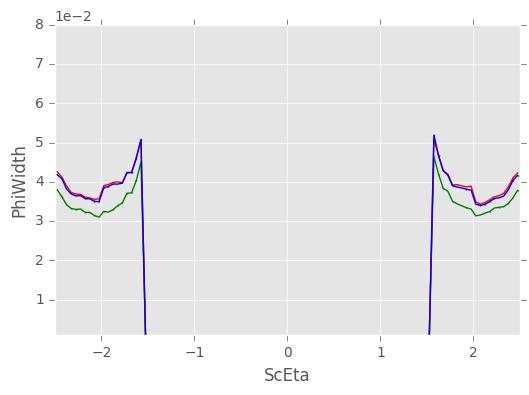

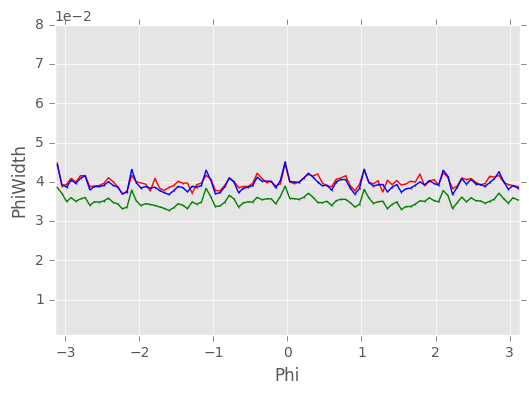

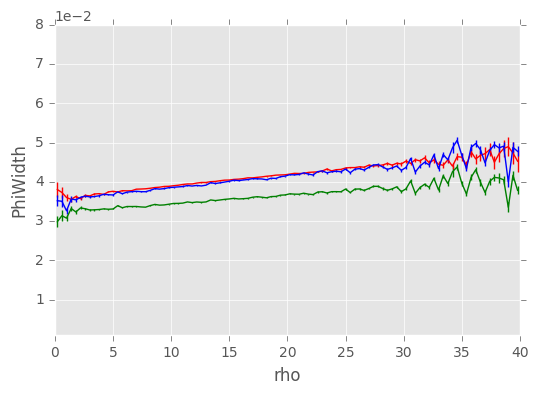

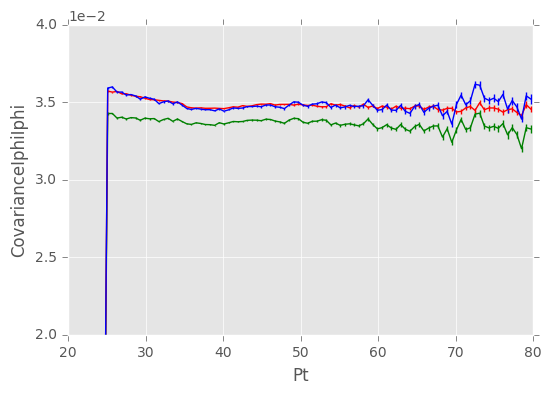

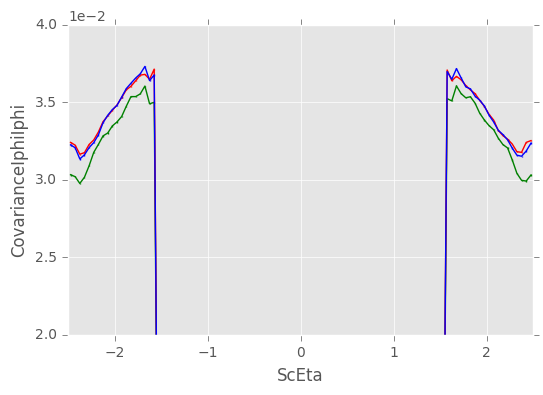

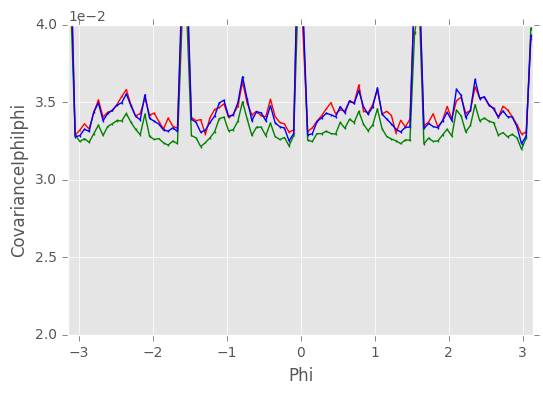

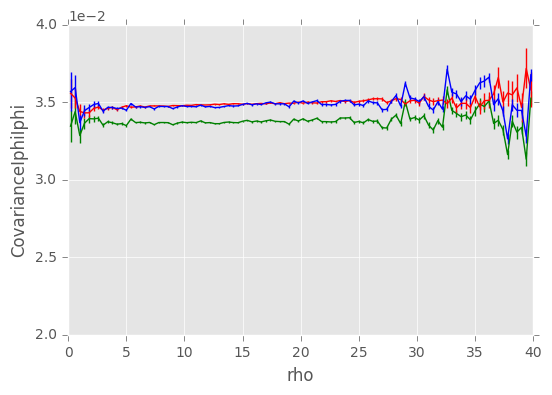

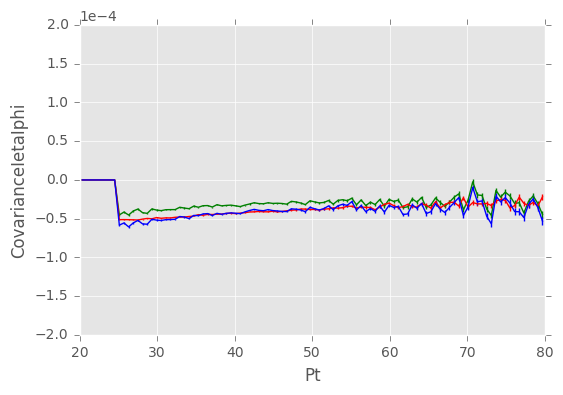

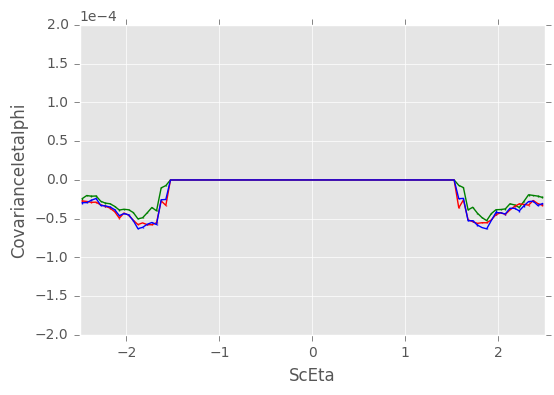

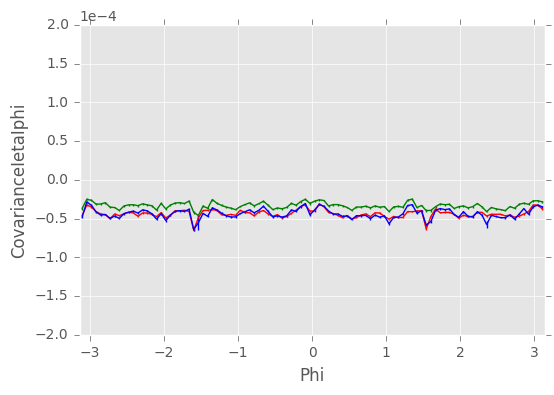

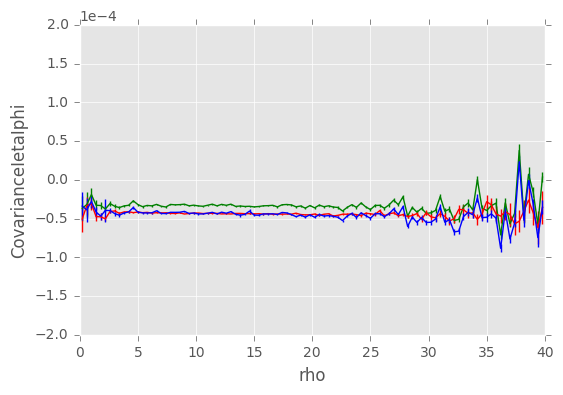

In [10]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEE
dfd=dfdataEE
sec= "EE"
name0="AllPeriods_Profiles_"+sec
section= "section4"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Profiles '+sec+"}")
f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.015
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        plot.exportToPdf(name,section)

In [11]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4',"CovarianceIphiIphi"]

mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=True) ), 
         ("moriondPhoIDcorrShowerShapes",dict(correct=showerShapes, rhoSubtraction=True) ) ]# ,
##("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)),
#("moriondPhoIDcorrAll",dict(correct=showerShapes+['PhoIso03'], rhoSubtraction=True))]

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")

In [17]:
n_jobs=20
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2)
qr_mc= quantileRegression("mc")
qr_mc.df = data2.reset_index(drop=True)
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )
dfmc = qr_mc.getDF()
dfdata = qr_data.getDF()

Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed: 12.4min
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed: 12.4min remaining: 118.0min
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed: 12.9min remaining: 54.8min
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed: 13.1min remaining: 32.7min
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed: 13.2min remaining: 21.5min
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed: 14.1min remaining: 15.5min
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed: 15.0min remaining: 11.3min
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed: 15.4min remaining:  7.7min
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed: 15.8min remaining:  4.9min
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed: 15.9min remaining:  2.6min
[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed: 16.0min finished


CPU times: user 6.51 s, sys: 5.54 s, total: 12.1 s
Wall time: 16min
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  3.4min
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed:  3.4min remaining: 32.5min
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed:  3.5min remaining: 14.9min
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed:  4.1min remaining: 10.2min
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed:  4.4min remaining:  7.2min
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed:  4.6min remaining:  5.1min
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed:  4.7min remaining:  3.5min
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed:  4.8min remaining:  2.4min
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed:  4.8min remaining:  1.5min
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed:  4.9min remaining:   48.8s
[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed:  5.2min finished


Computing moriondPhoIDcorrShowerShapes, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi']}


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  3.3min
[Parallel(n_jobs=20)]: Done   2 out of  21 | elapsed:  3.4min remaining: 32.0min
[Parallel(n_jobs=20)]: Done   4 out of  21 | elapsed:  3.5min remaining: 15.0min
[Parallel(n_jobs=20)]: Done   6 out of  21 | elapsed:  3.7min remaining:  9.3min
[Parallel(n_jobs=20)]: Done   8 out of  21 | elapsed:  3.9min remaining:  6.4min
[Parallel(n_jobs=20)]: Done  10 out of  21 | elapsed:  4.2min remaining:  4.6min
[Parallel(n_jobs=20)]: Done  12 out of  21 | elapsed:  4.3min remaining:  3.2min
[Parallel(n_jobs=20)]: Done  14 out of  21 | elapsed:  4.6min remaining:  2.3min
[Parallel(n_jobs=20)]: Done  16 out of  21 | elapsed:  4.8min remaining:  1.5min
[Parallel(n_jobs=20)]: Done  18 out of  21 | elapsed:  5.1min remaining:   50.6s
[Parallel(n_jobs=20)]: Done  21 out of  21 | elapsed:  5.2min finished


CPU times: user 10 s, sys: 11.4 s, total: 21.4 s
Wall time: 10min 26s


In [33]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5)')# and (R9>0.8)')
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5)')# and (R9>0.8)')

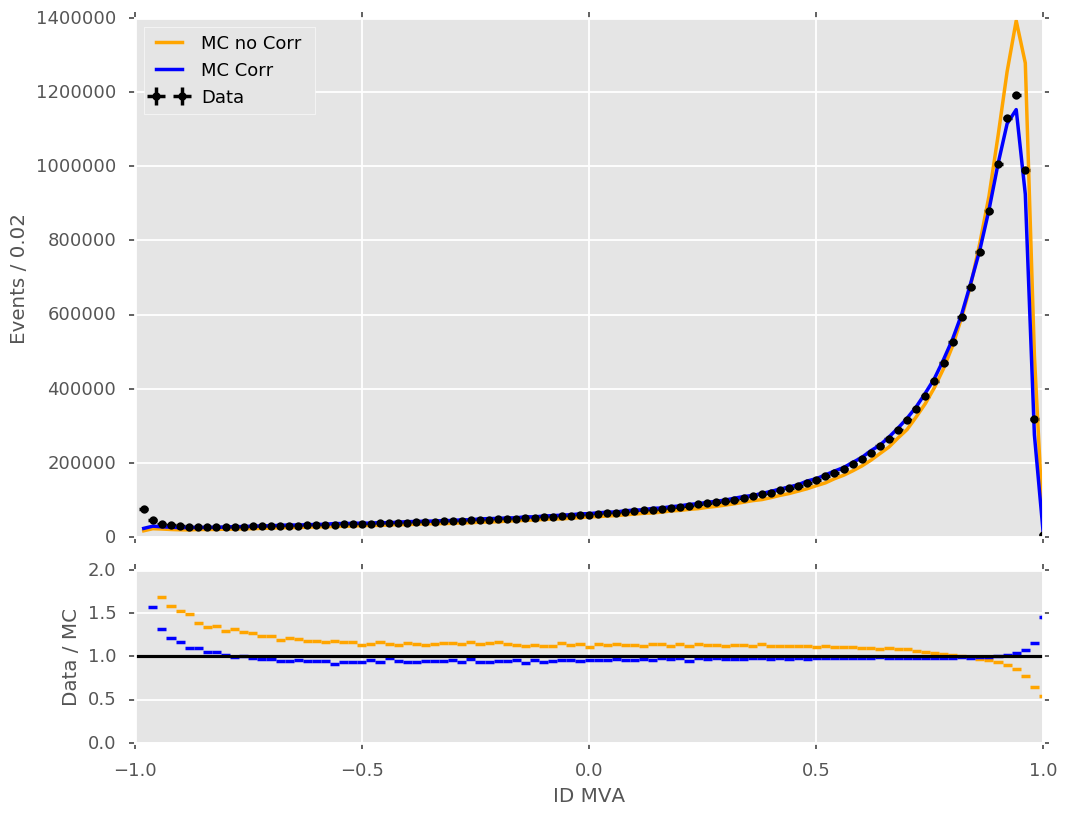

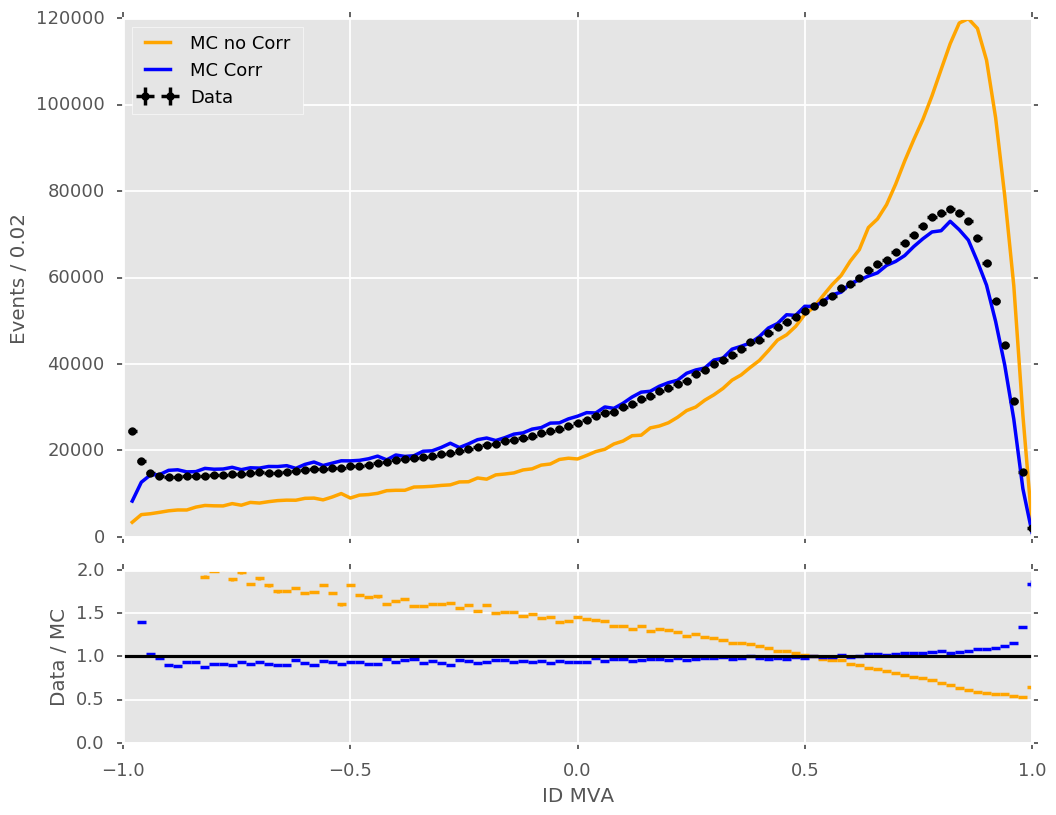

In [34]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrShowerShapes']
mcstyles = [ dict(label='MC no Corr ',color='orange'),
             dict(label='MC Corr ',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
  

In [35]:
import matplotlib as mpl
from functools import reduce
mpl.rcParams['figure.figsize'] = (8,8)

mpl.rc('xtick', labelsize=40) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

def set_style(obj,color):
    obj.set_color(color)
    obj.set_linewidth(2)
    
def do_boxplot(df,column,by,color,ax):
    objs = df.query('%s > -0.8' % column).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

def do_var_boxplot(df,cut,column,by,color,ax):
    objs = df.query(cut).boxplot(column=column,by=by, return_type='dict', ax=ax)
    map(lambda x: set_style(x,color), reduce(lambda x,y: x+y, objs[column].values()))

In [36]:
binsEta = np.linspace(-2.5,2.5, 21)

dfmc['etaBin'] = pd.cut(dfmc.ScEta,binsEta)
dfdata['etaBin'] = pd.cut(dfdata.ScEta,binsEta)

binsPt = np.linspace(20,80,21)

dfmc['ptBin'] = pd.cut(dfmc.Pt,binsPt)
dfdata['ptBin'] = pd.cut(dfdata.Pt,binsPt)

dfmcEB['ptBin'] = pd.cut(dfmcEB.Pt,binsPt)
dfEB['ptBin'] = pd.cut(dfEB.Pt,binsPt)

dfmcEE['ptBin'] = pd.cut(dfmcEE.Pt,binsPt)
dfEE['ptBin'] = pd.cut(dfEE.Pt,binsPt)



/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

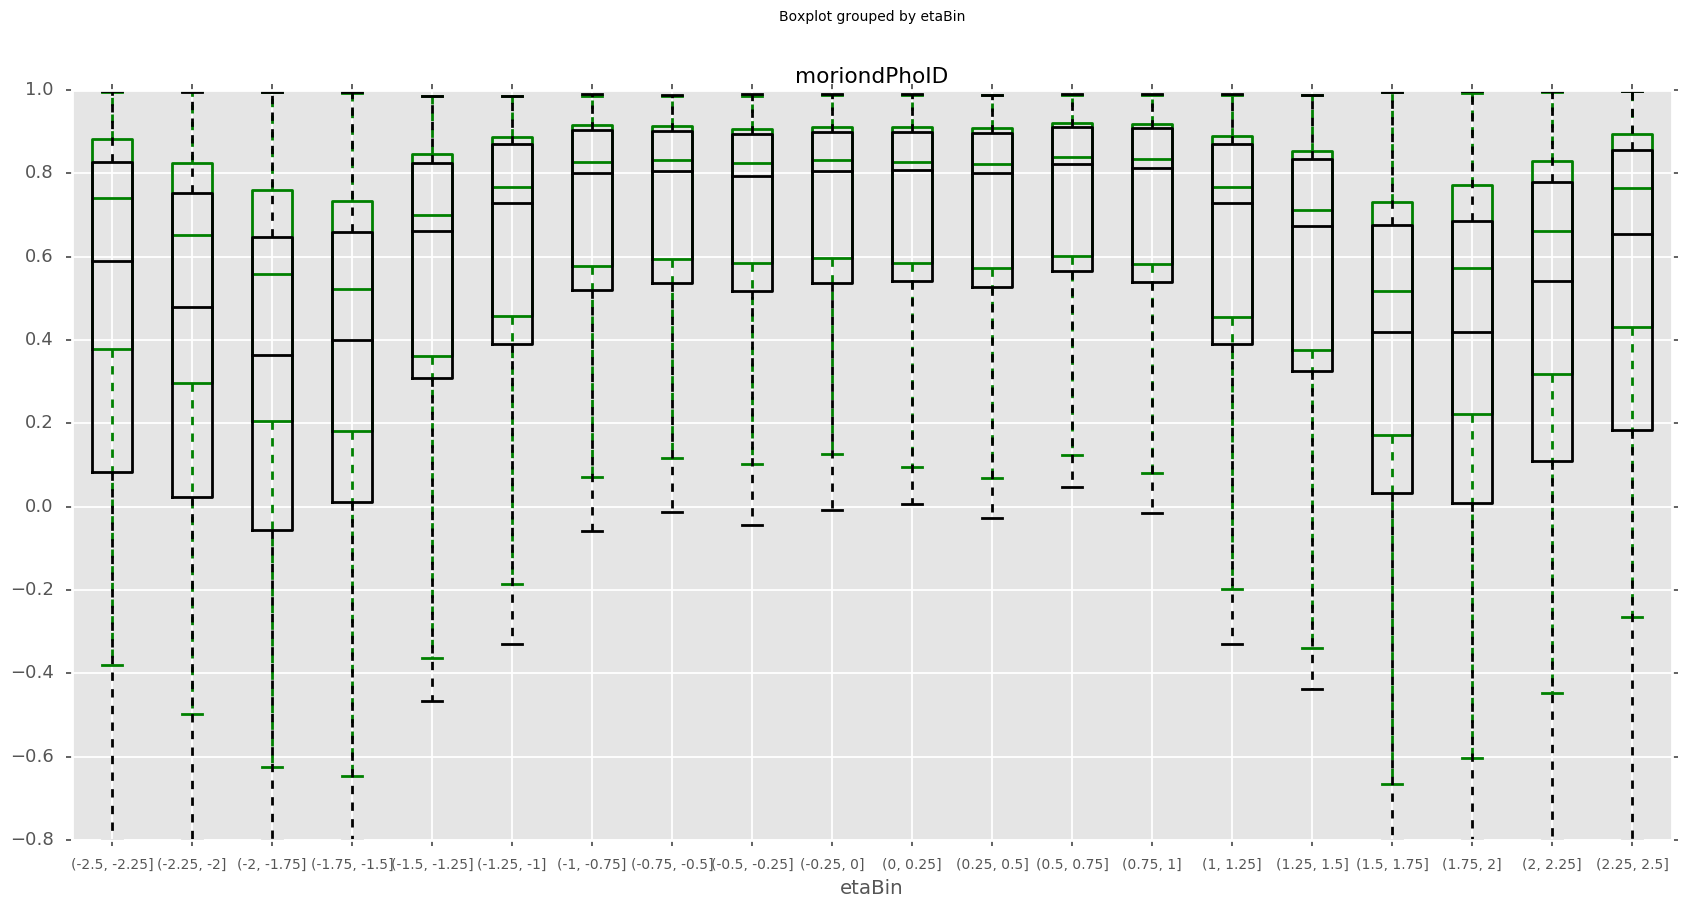

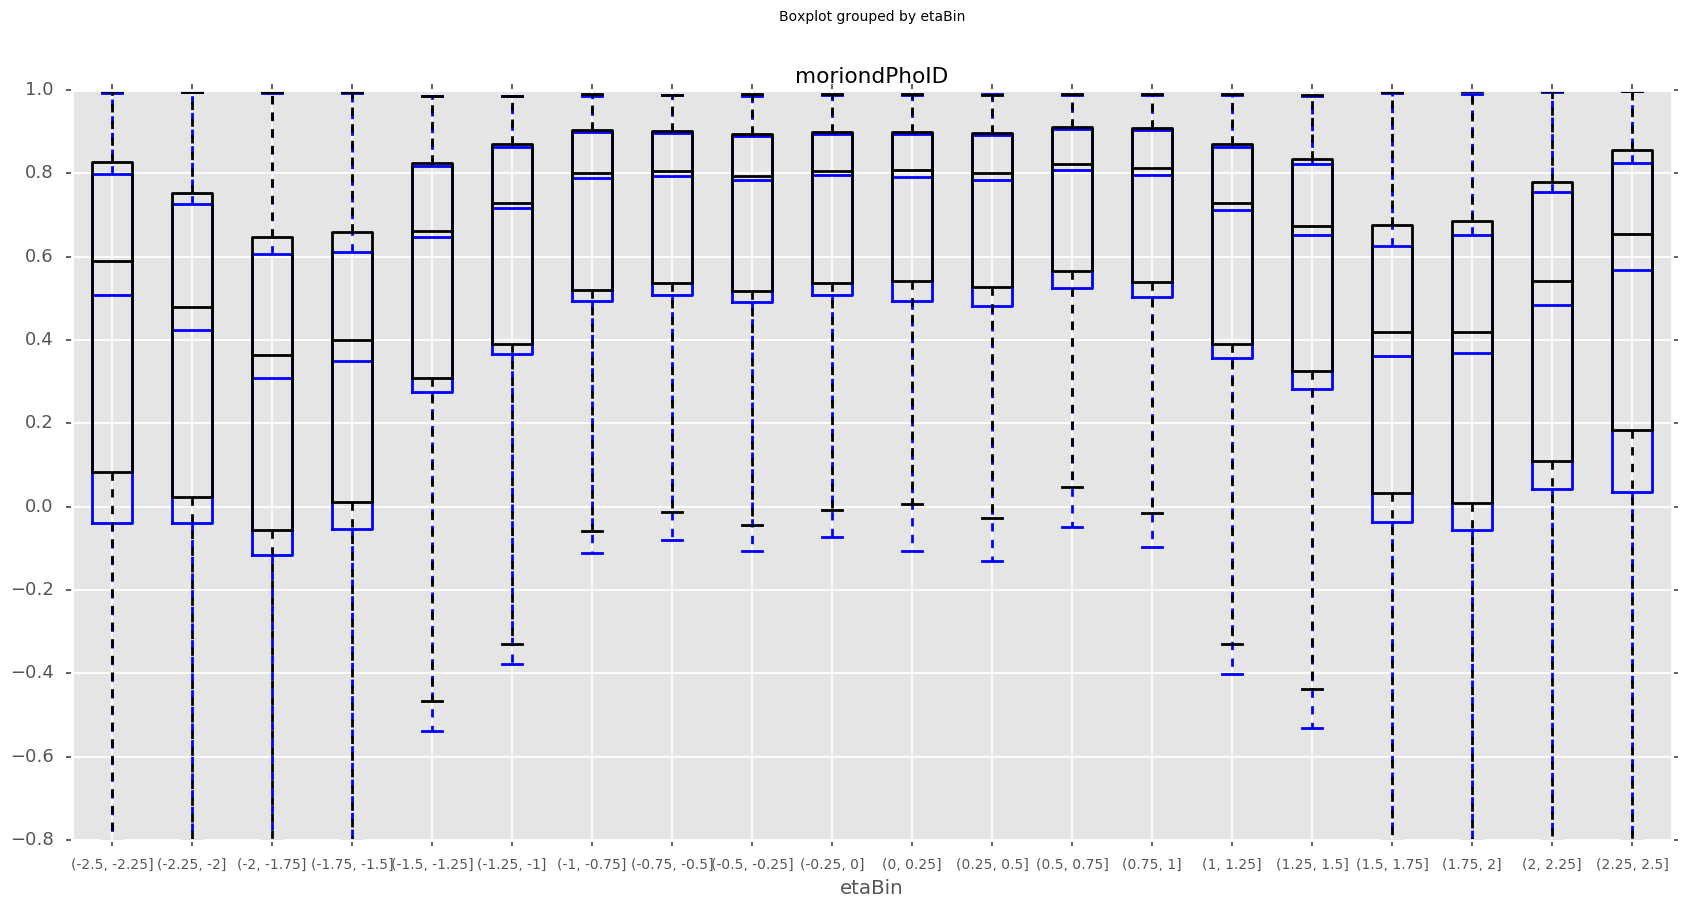

In [ ]:
%matplotlib inline
plt.style.use('seaborn-talk')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoID', 'etaBin', 'green', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmc,'moriondPhoIDcorrShowerShapes', 'etaBin', 'blue', ax)
do_boxplot(dfdata,'moriondPhoID', 'etaBin', 'black', ax)

fig.show()

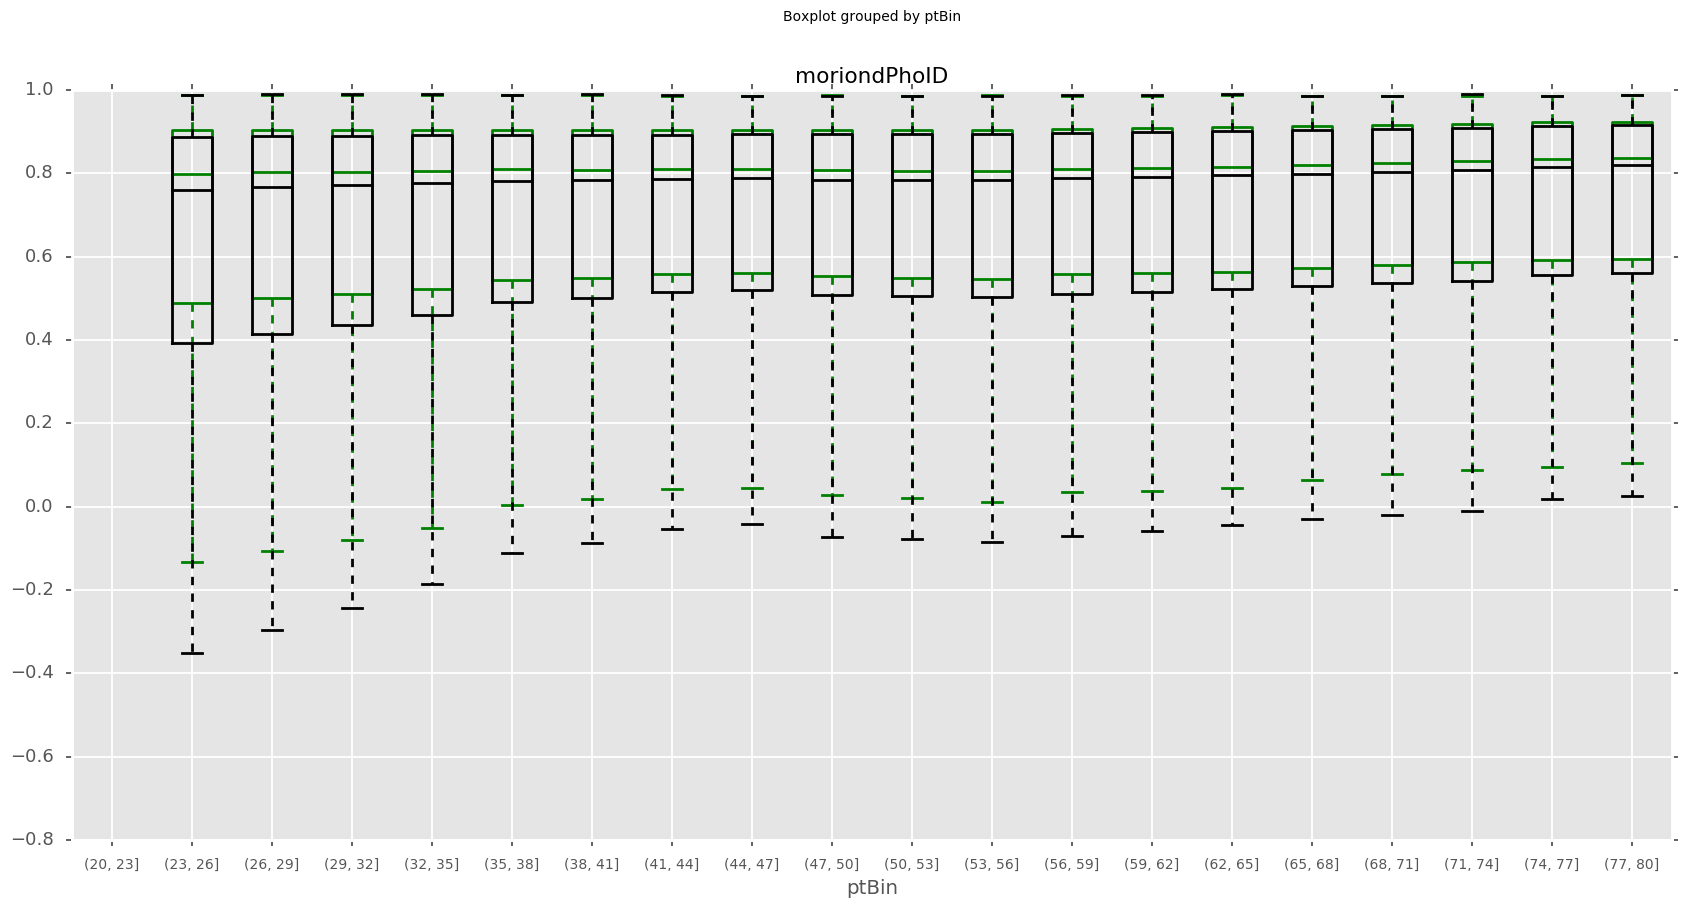

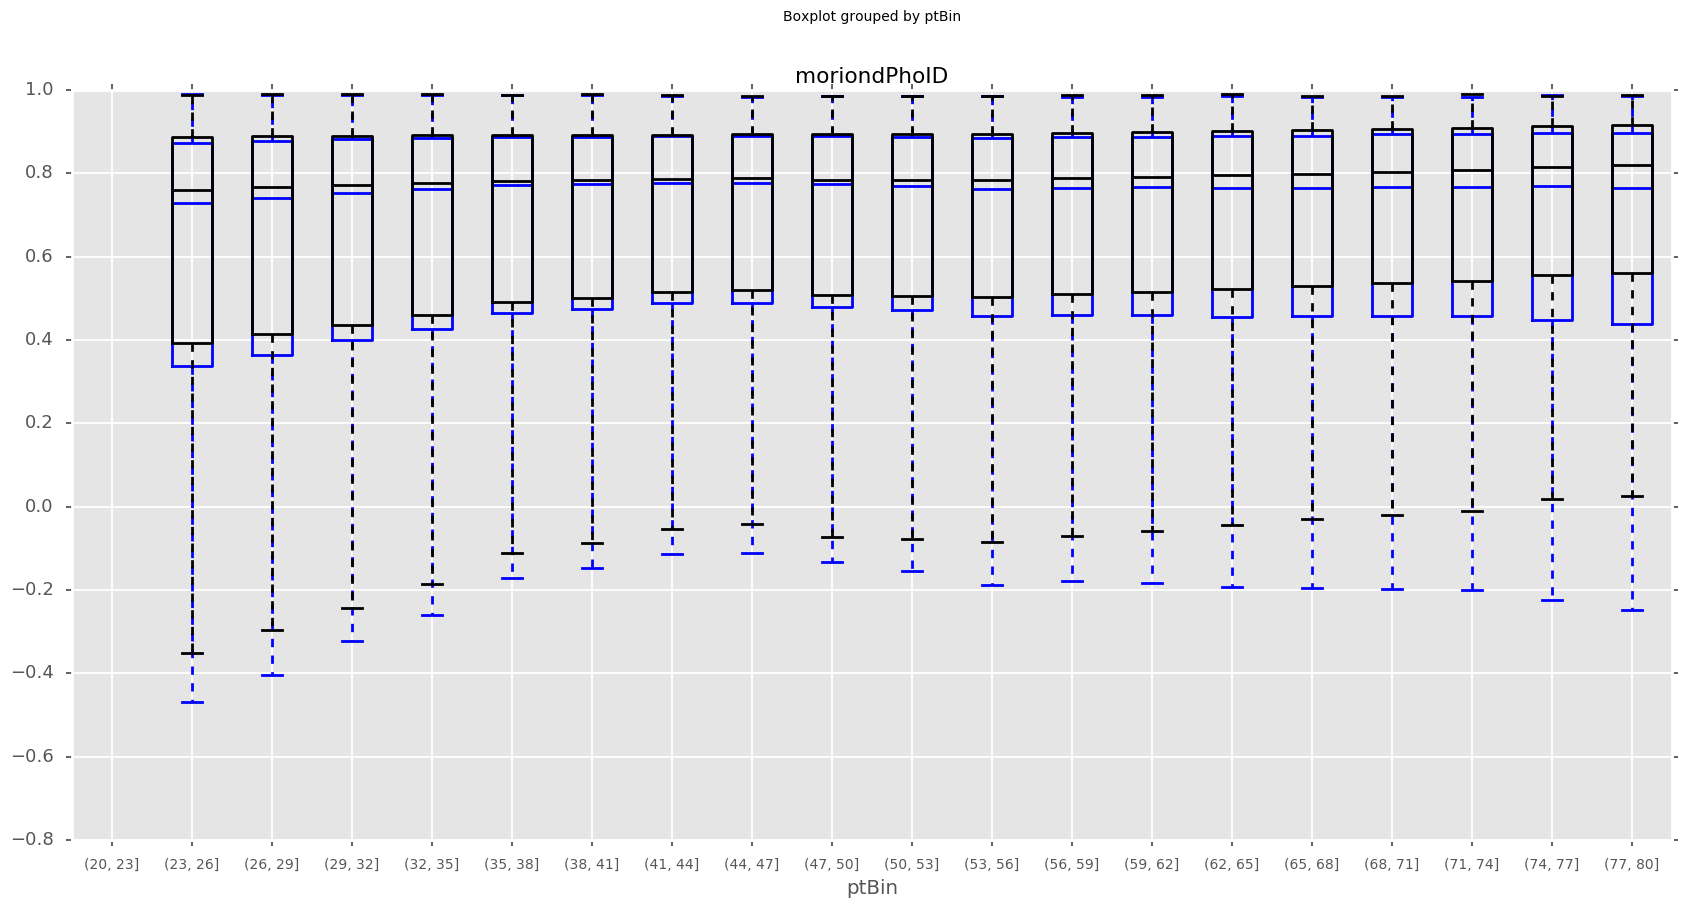

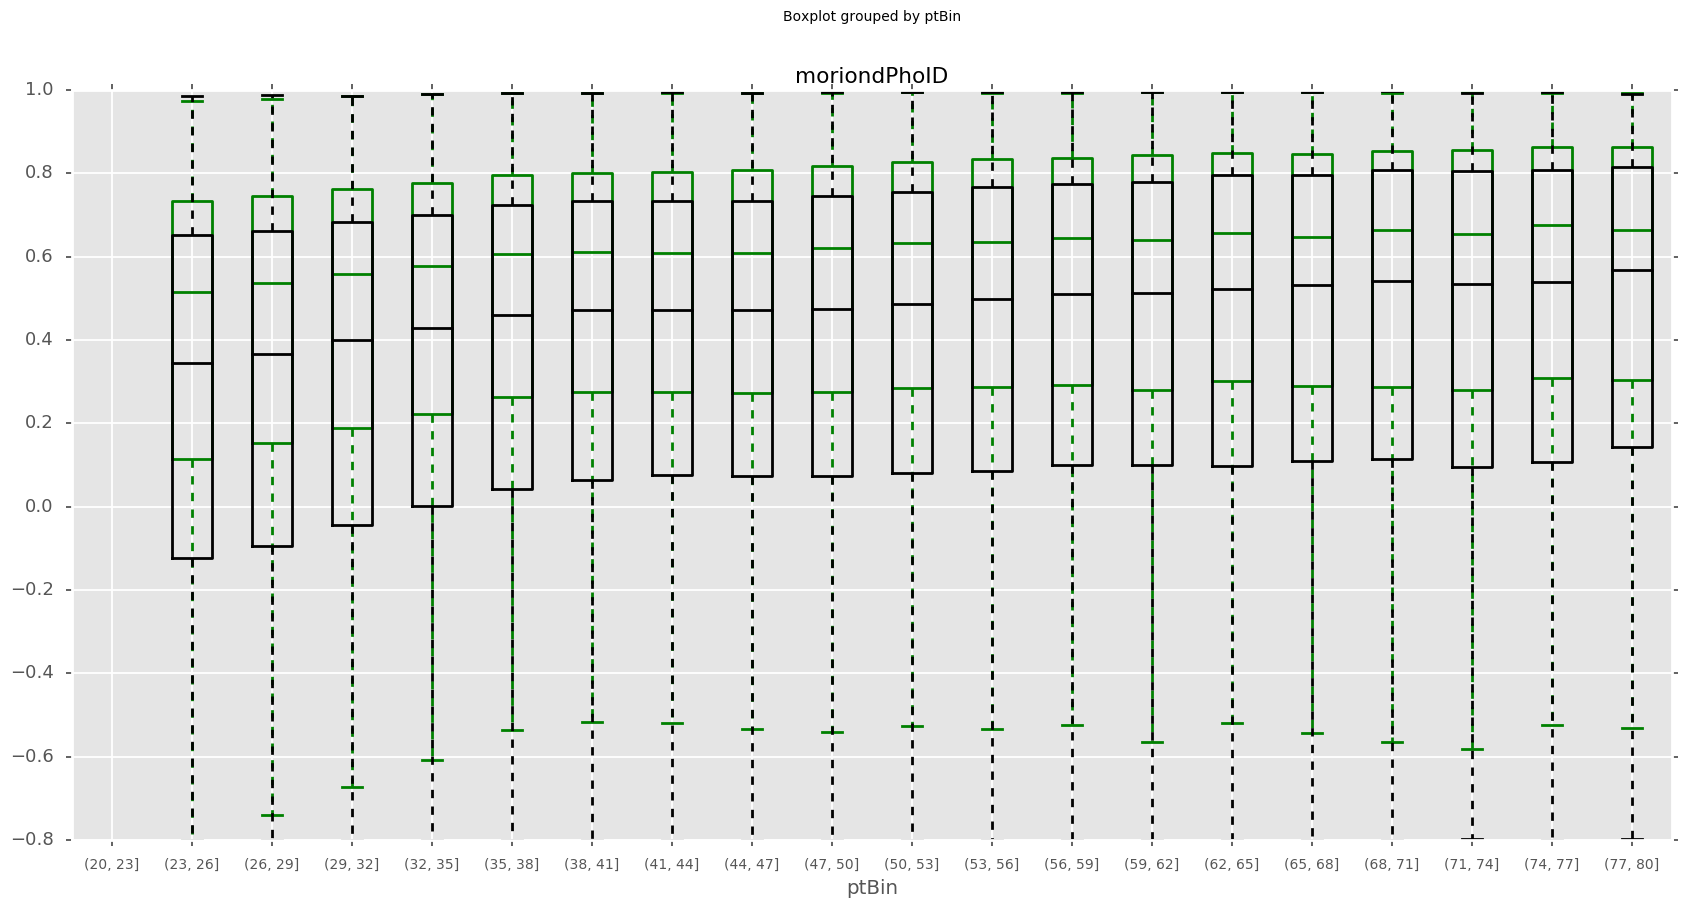

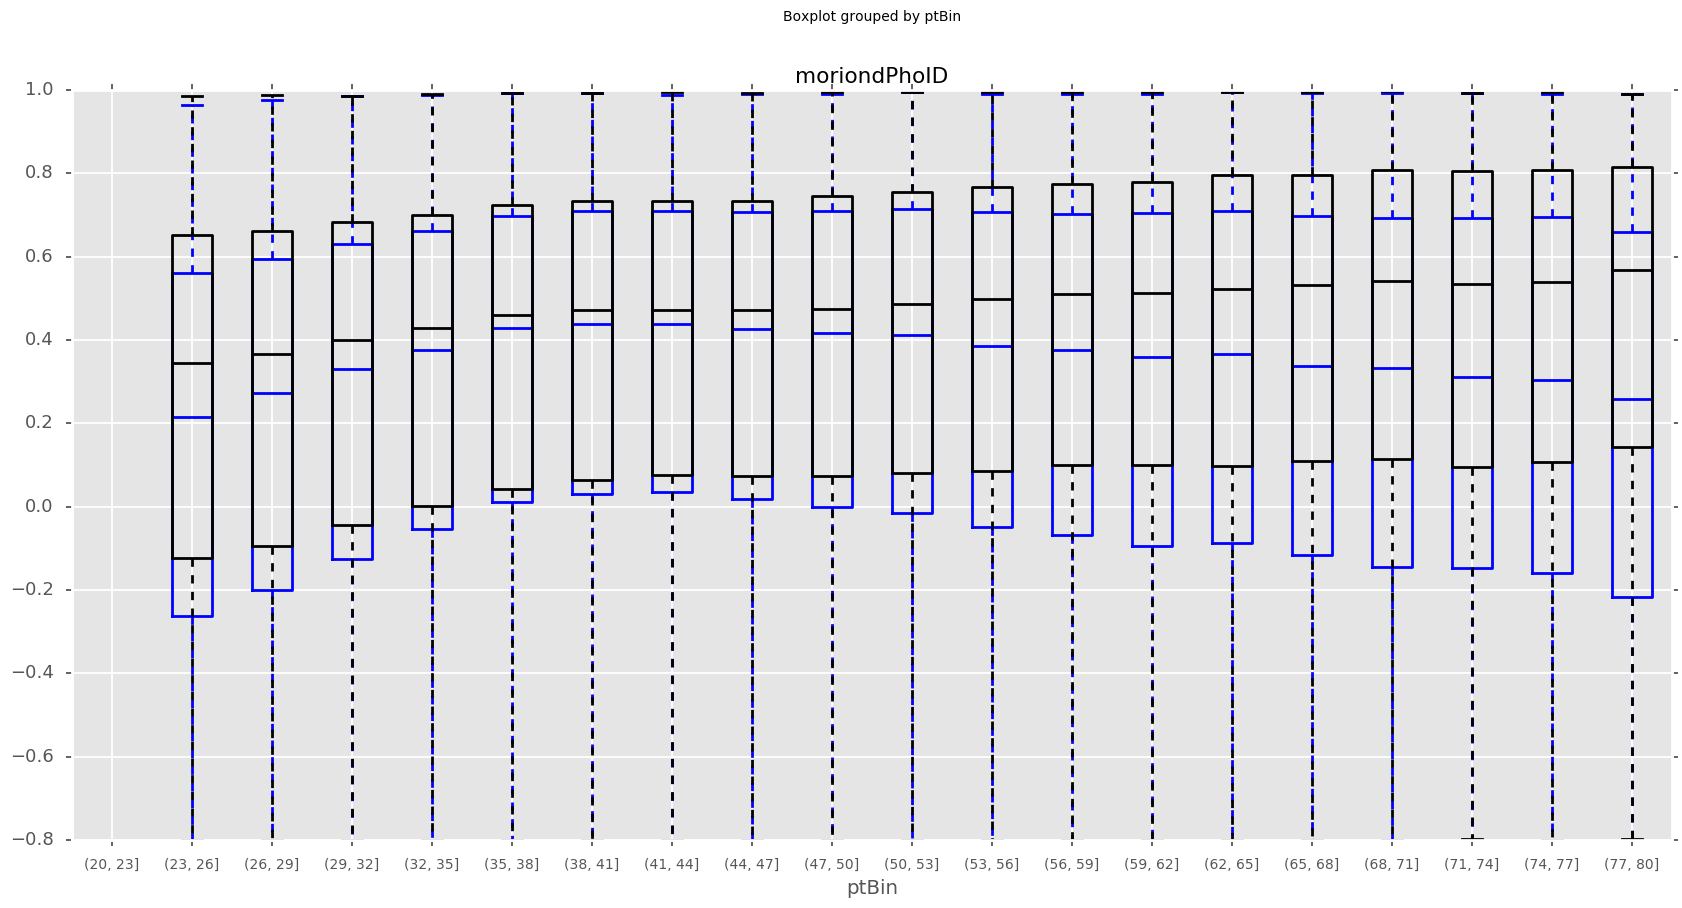

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoID', 'ptBin', 'green', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEB,'moriondPhoIDcorrShowerShapes', 'ptBin', 'blue', ax)
do_boxplot(dfEB,'moriondPhoID', 'ptBin', 'black', ax)


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoID', 'ptBin', 'green', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

do_boxplot(dfmcEE,'moriondPhoIDcorrShowerShapes', 'ptBin', 'blue', ax)
do_boxplot(dfEE,'moriondPhoID', 'ptBin', 'black', ax)

# dfmc.boxplot(column='moriondPhoIDcorr',by='etaBin', return_type='dict', ax=ax, color='blue')

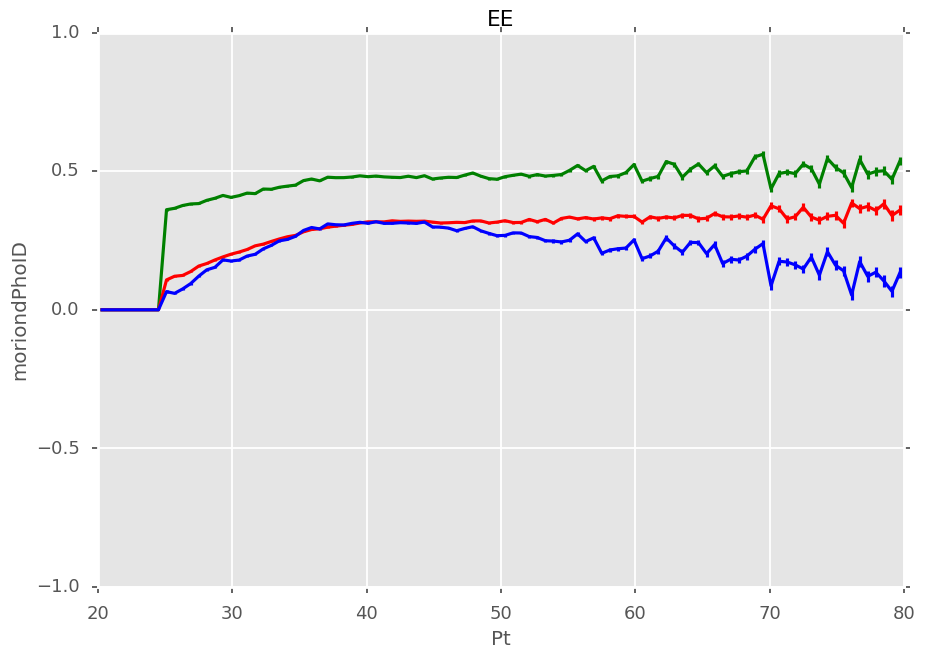

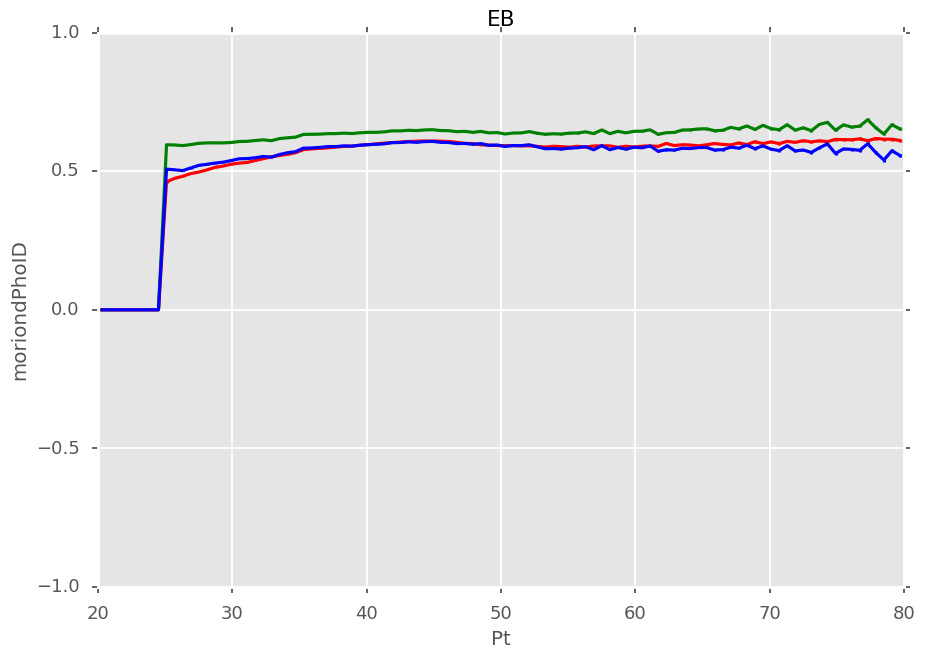

In [ ]:
dfm=dfmcEE
dfd=dfEE
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_title("EE")
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])

dfm=dfmcEB
dfd=dfEB
xvar="Pt"
yvar="moriondPhoID"
xmin,xmax=20.0,80.0
minY=-1
maxY=1
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_xlabel(xvar)
ax.set_ylabel(yvar)
ax.set_title("EB")
ax.set_xlim(xmin,xmax)
ax.set_ylim(minY,maxY)
plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
plot.Profile(dfm[xvar]  , dfm[yvar+'corrShowerShapes']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])